import necessary libraries to 

In [13]:
# import libraries
import re
import urllib3
import certifi


Added regex expressions to connect to metacritic website for top 100 movies

In [14]:
title_regex=re.compile(r"class=\"title\"><h3>(.+)</h3>")
date_regex=re.compile(r"class=\"clamp-details\">\s+<span>(.+)</span>")
description_regex=re.compile(r"<div class=\"summary\">\s*([\S\s]+?)\s*</div>")
score_regex = re.compile(r"<span class=\"title\">Metascore:</span>\s+<a class=\"metascore_anchor\" href=\"/movie/.*?/critic-reviews\">\s+<div class=\"metascore_w large movie .+\">(.*?)</div>")
image_regex = re.compile(r"<a href=\"/movie/.*\"><img src=\"(.*)\" alt=\"")

# Construct an HTTP pool for connection
http=urllib3.PoolManager(ca_certs=certifi.where())


Create credentials file saved on your machine for security purposes
Place connection string into credentials file(e.g My file is Secrets.json)
import json, pymongo, certifi for accessing credentials file
Connect to MongoDB using connection string from credentials


In [15]:
import json
import pymongo
import certifi

with open('C:\\Users\SETUPUSER\Desktop\Secret\Secrets.json') as f:
    data = json.load(f)
    connstring = data['connstring']
print(f"My secret key is {len(connstring)} characters in length.")

# Connect to the database using known good certificates
client = pymongo.MongoClient(connstring, tlsCAFile=certifi.where())
# Fetch the database named "DA-320"
da320_database = client['DA_320']

# Within the database we have "collections". Think of them as tables in SQL.
metacritic_data = da320_database['Metacritic_Movie_1']

My secret key is 61 characters in length.


Web scraping function used to scrape metacritic for movies

In [16]:

import pandas as pd
#retrive a list of movies from a particular year and page of Metacritic
def metacritic_scraper (year:int,page:int) -> pd.DataFrame:
    #fetch the webpage
   url = f"https://www.metacritic.com/browse/movies/score/metascore/year/filtered?year_selected={year}&sort=desc&view=detailed&page={page}"
   # Construct python request pool
   response = http.request('GET',url,headers={'User-Agent':'Mozilla/5.0'})
   datastring = str(response.data, "utf-8")

   #execute all regular expression
   titles = title_regex.findall(datastring)
   dates = date_regex.findall(datastring)
   descriptions = description_regex.findall(datastring)
   scores = score_regex.findall(datastring)
   images = image_regex.findall(datastring)
   #return unified collection  
   print("title: " , len(titles), "date: " , len(dates), "description: " , len(descriptions), "score: " , len(scores), "image: " , len(images))
   dataset = {"title": titles, "date": dates, "description": descriptions, "score": scores, "image":images}
   return pd.DataFrame(dataset) 

Connect to metacritic to retrieve movie from 2000-2023
Loop through each year and page
Then insert the records retrieved into MongoDB Collection.

In [17]:
import re
import time

#CVS file
for year in range(2000,2023):
   page=0
   print(f"Collection date for {year} page {page}.....")

   #retry a page multiple times
   while True:
      data = metacritic_scraper(year,page)

      #stop when we reach a page with zero rows
      if len(data) == 0:
         break

      #conver the dataframe into a list of movies to insert into Mongo DB
      movies_to_insert =[]
      for row in data.itertuples():
         movie = {
            "title": row.title,
            "release_date": row.date,
            "description": row.description,
            "metascore": row.score,
            "image_url": row.image,
         }
         movies_to_insert.append(movie)
         
      #insert resords into MongoDB
      print(f"Inserting{len(movies_to_insert)} moview for year {year} page {page}")
      metacritic_data.insert_many(movies_to_insert)
      page = page+1


Collection date for 2000 page 0.....
title:  100 date:  100 description:  100 score:  100 image:  100
Inserting100 moview for year 2000 page 0
title:  100 date:  100 description:  100 score:  100 image:  100
Inserting100 moview for year 2000 page 1
title:  100 date:  100 description:  100 score:  100 image:  100
Inserting100 moview for year 2000 page 2
title:  65 date:  65 description:  65 score:  65 image:  65
Inserting65 moview for year 2000 page 3
title:  0 date:  0 description:  0 score:  0 image:  0
Collection date for 2001 page 0.....
title:  100 date:  100 description:  100 score:  100 image:  100
Inserting100 moview for year 2001 page 0
title:  100 date:  100 description:  100 score:  100 image:  100
Inserting100 moview for year 2001 page 1
title:  100 date:  100 description:  100 score:  100 image:  100
Inserting100 moview for year 2001 page 2
title:  85 date:  85 description:  85 score:  85 image:  85
Inserting85 moview for year 2001 page 3
title:  0 date:  0 description:  0 

KeyboardInterrupt: 

Connect to mongoDB create new collection


In [ ]:
import json
import pymongo
import certifi
import pandas

with open('C:/Users/SETUPUSER/Desktop/Secret/Secrets.json') as f:
    data = json.load(f)
    
    connstring = data['connstring']
print(f"My secret key is {len(connstring)} characters in length.")

# Connect to the database using known good certificates
client = pymongo.MongoClient(connstring, tlsCAFile=certifi.where())
# Fetch the database named "DA-320"
da320_database = client['DA_320']

# Within the database we have "collections". Think of them as tables in SQL.
metacritic_data = da320_database['Metacritic_Movie_1']
client = pymongo.MongoClient (connstring, tlsCAFile=certifi.where())
da320_database = client['DA_320']
metactritic_data = da320_database['Metacritic_movie_1']
metacritic = pandas.DataFrame(metacritic_data.find())

metacritic.head()

My secret key is 61 characters in length.


,_id,title,release_date,description,metascore,image_url
0,638a42301211b7fa114f2c15,"Crouching Tiger, Hidden Dragon","December 8, 2000","In 19th century China, a magical sword given b...",94,https://static.metacritic.com/images/products/...
1,638a42301211b7fa114f2c16,Yi Yi,"October 6, 2000",This film portrays life through portraits of t...,93,https://static.metacritic.com/images/products/...
2,638a42301211b7fa114f2c17,Beau Travail,"March 31, 2000",The soldiers of a small French Foreign Legion ...,91,https://static.metacritic.com/images/products/...
3,638a42301211b7fa114f2c18,Almost Famous,"September 13, 2000","In the 1970's, a high school boy (Fugit) is gi...",90,https://static.metacritic.com/images/products/...
4,638a42301211b7fa114f2c19,Chicken Run,"June 21, 2000",A claymation spoof of classic prison-camp flic...,88,https://static.metacritic.com/images/products/...


Transforming the data in metacritic
converting data to numeric form
Doing so to better be able to analyze data in graph

In [ ]:
metacritic.release_date = pandas.to_datetime (metacritic.release_date)
metacritic['year'] = metacritic.release_date.dt.year
metacritic['month'] = metacritic.release_date.dt.month
metacritic.metascore = pandas.to_numeric(metacritic.metascore)
metacritic.head()


,_id,title,release_date,description,metascore,image_url,year,month
0,638a42301211b7fa114f2c15,"Crouching Tiger, Hidden Dragon",2000-12-08,"In 19th century China, a magical sword given b...",94,https://static.metacritic.com/images/products/...,2000,12
1,638a42301211b7fa114f2c16,Yi Yi,2000-10-06,This film portrays life through portraits of t...,93,https://static.metacritic.com/images/products/...,2000,10
2,638a42301211b7fa114f2c17,Beau Travail,2000-03-31,The soldiers of a small French Foreign Legion ...,91,https://static.metacritic.com/images/products/...,2000,3
3,638a42301211b7fa114f2c18,Almost Famous,2000-09-13,"In the 1970's, a high school boy (Fugit) is gi...",90,https://static.metacritic.com/images/products/...,2000,9
4,638a42301211b7fa114f2c19,Chicken Run,2000-06-21,A claymation spoof of classic prison-camp flic...,88,https://static.metacritic.com/images/products/...,2000,6


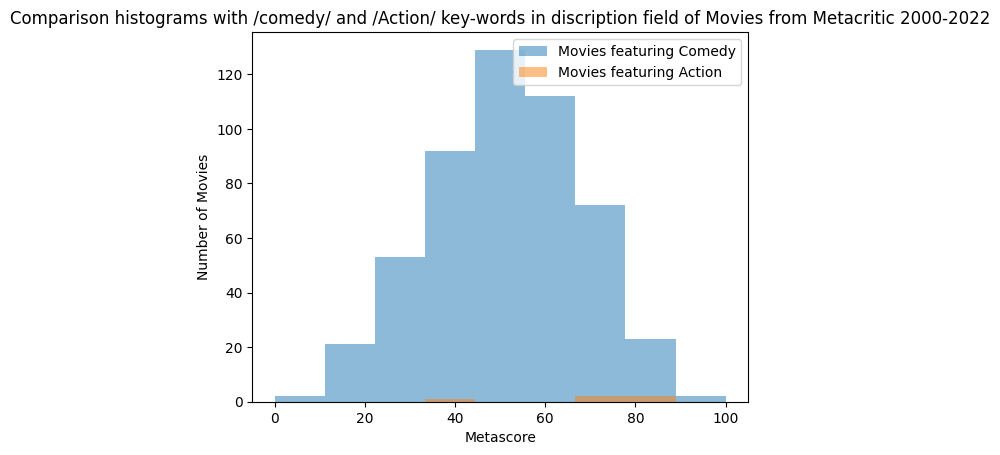

In [19]:
from matplotlib import pyplot
from matplotlib.ticker import FormatStrFormatter
import numpy

# Retrieve metascore for happy and sad in description
scores_Comedy = metacritic[metacritic['description'].str.contains("comedy")].metascore
scores_Action = metacritic[metacritic['description'].str.contains("Action")].metascore

# Plot into buckets
bins = numpy.linspace(0, 100, 10)
pyplot.title("Comparison histograms with /comedy/ and /Action/ key-words in discription field of Movies from Metacritic 2000-2022")
pyplot.xlabel('Metascore')
pyplot.ylabel('Number of Movies')
pyplot.hist (scores_Comedy, bins, alpha=0.5, label='Movies featuring Comedy')
pyplot.hist (scores_Action, bins, alpha=0.5, label='Movies featuring Action')

pyplot.legend (loc='upper right') 
pyplot.show()



When comparing metascores of comedy/action movies we see that comedy movies, had been reviewed more extensively and higher than action movies. I'd just say that it's easier to make a cheesy comedy movie and get laughs, versus a cheesy action movie!